# Problem 1: Null distributions of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

## Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [1]:
#conducting t tests on groups of data - one sample, two sample 

#importing the necessary packages for the code 
import numpy as np
from scipy import stats 

#height data for the two groups of players 
lakers = [200, 210, 220,225,215];
heat = [190, 220, 193, 200, 190];
mu=195;

tval= ((np.mean(lakers)-mu)/np.std(lakers,ddof=1))*np.sqrt(len(lakers)); #calculating the one sample t statistic 
#for the lakers heights with the given population mean. 
print("The calculated one sample t value is",tval)
print("T value from stats packages", stats.ttest_1samp(lakers,mu))


#two sample ttest assuming equal variance, independent populations. two-tailed  
n1=len(lakers); #number of samples 
n2=len(heat);

std1=np.std(lakers,ddof=1); #standard deviation for both groups of samples 
std2=np.std(heat,ddof=1);
sp=np.sqrt(((n1-1)*std1**2+(n2-1)*std2**2)/(n1+n2-2)); #calculating the pooled standard deviation  

tval_2sample=((np.mean(lakers)-np.mean(heat))/(sp*np.sqrt((1/n1)+(1/n2)))); #calculating the two sample t statistic 
print("The calculated two sample t value is",tval_2sample)

print("Two sample t value from stats package",stats.ttest_ind(lakers,heat)) 

The calculated one sample t value is 4.417410272265133
T value from stats packages Ttest_1sampResult(statistic=4.4174102722651325, pvalue=0.011534048799787354)
The calculated two sample t value is 2.167939197635687
Two sample t value from stats package Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)


## Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.


Text(0.5, 1.0, 'T Distribution for one sample(dof=4) and two sample(dof=8). Mu=195')

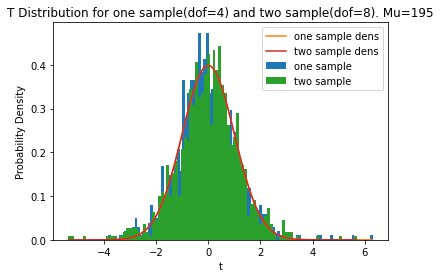

In [2]:

import matplotlib.pyplot as plt

histdata=[]; # initiating an empty vector to add the t values from the following loop into 
mu2=195; #population mean 
sigma2=np.std(lakers); #assumed standard deviation of the pop.


for i in range(0,1000): #for loop iterates over range 0-999 for (1000 times) 
    randvals=np.random.normal(mu2,sigma2,9); #samples 9 values from a normal distribution with the given mean and 
    #standard deviation 
    
    #calculates the mean, standard deviation and t value for the sampled group and adds it to the list outside of the 
    #loop 
    avg=np.mean(randvals);
    stdev=np.std(randvals,ddof=1);
    t=((avg-mu2)/stdev)*np.sqrt(9);
    histdata.append(t);

#plots the histogram of the one sample t values and the density plot for n=9   
x,bins,patches=plt.hist(histdata,bins=100,density=True);
plt.plot(bins,stats.norm.pdf(bins))



#two sample t distribution assuming the populations are independent with equal means and variance where n=5 
histdata2=[];

for i in range(0,1000):
    randvals2=np.random.normal(mu2,sigma2,5); #takes 5 samples from two normal distributions 
    randvals3=np.random.normal(mu2,sigma2,5);
    
    #finds the pooled standard deviation and the 2 sample t value for the two groups of samples 
    sp=np.sqrt(((5-1)*np.std(randvals2,ddof=1)**2+(5-1)*np.std(randvals3,ddof=1)**2)/(len(randvals2)+len(randvals3)-
                                                                                      2));
    t2=((np.mean(randvals2)-np.mean(randvals3))/(sp*np.sqrt((1/len(randvals2))+(1/len(randvals3)))));
    histdata2.append(t2)

#plots the histogram of the two sample t values and the density plot for n=5 
x2,bins2,patches2=plt.hist(histdata2,bins=100,density=True);
plt.plot(bins2,stats.norm.pdf(bins2))

#adds labels to the plots
plt.legend(["one sample dens","two sample dens","one sample","two sample"])
plt.xlabel('t')
plt.ylabel('Probability Density')
dof1=len(lakers)-1
dof2=len(lakers)+len(heat)-2
plt.title('T Distribution for one sample(dof='+str(dof1)+') and two sample(dof='+str(dof2)+'). Mu=195')

Based on your figure(s) above, how do the two distributions compare? From the plots above, it appears that the distributions are roughly the same despite the different calculations of t and sample numbers.

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [3]:
#a two sided t test is necessary to determine if the means are equal or not. 
p=(sum(histdata2>=tval_2sample )/1000)*2 #to account for the negative t value - multiply the p value by 2 
print("The likelihood that the heights are from populations with the same mean is",p)
print("P value from the stats package",stats.ttest_ind(lakers,heat)[1])

The likelihood that the heights are from populations with the same mean is 0.07
P value from the stats package 0.06201738353641719


# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

Text(0.5, 1.0, '  n=30')

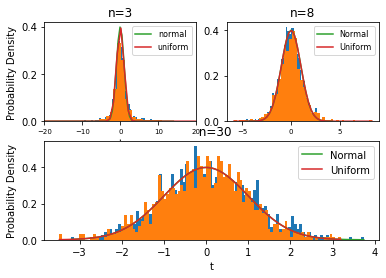

In [7]:

#taking samples from a normal and uniform distribution and plotting the t distribution 
mu3=50; #mean and standard deviation of the normal distribution
sigma3=2;

samplenum=[3,8,30]; #list with the number of samples for each sampling attempt 

#empty lists to add the t values into for each group of samples 
vals3=[];
vals8=[];
vals30=[];
univals3=[];
univals8=[];
univals30=[];

for i in range(0,1000):
    
    for i in range(0,len(samplenum)): #for each sample number the normal and uniform distributions are sampled 
        #and the t values are calculated 
        vals=np.random.normal(mu3,sigma3,samplenum[i]) #taking the specified amount of samples from the normal dist.
        univals=np.random.uniform(0,100,samplenum[i]) #from the uniform distribution with limit 2*mu
        avg=np.mean(vals)
        stdev=np.std(vals,ddof=1)
        t=((avg-mu3)/stdev)*np.sqrt(samplenum[i])
        
        uniavg=np.mean(univals)
        unistdev=np.std(univals,ddof=1)
        uni_t=((uniavg-mu3)/unistdev)*np.sqrt(samplenum[i])
        
        if samplenum[i]==3: #for each sample number the t values are placed in their respective lists 
            vals3.append(t)
            univals3.append(uni_t)
        if samplenum[i]==8:
            vals8.append(t)
            univals8.append(uni_t)
        if samplenum[i]==30:
            vals30.append(t)
            univals30.append(uni_t)
        

# plots grouped by their sample numbers 
plt.subplot(2,2,1)     
nx,nbins,npatches=plt.hist(vals3,bins=100,density=True);
ux,ubins,upatches=plt.hist(univals3,bins=100,density=True);
plt.plot(nbins,stats.norm.pdf(nbins))
plt.plot(ubins,stats.norm.pdf(ubins))


plt.xlim([-20,20])
plt.xticks(fontsize=7)
plt.legend(["normal","uniform"],fontsize=8)
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('n=3')

plt.subplot(2,2,2) 
nx8,nbins8,npatches8=plt.hist(vals8,bins=50,density=True);
ux8,ubins8,upatches8=plt.hist(univals8,bins=50,density=True);
plt.plot(nbins8,stats.norm.pdf(nbins8))
plt.plot(ubins8,stats.norm.pdf(ubins8))

plt.legend(["Normal","Uniform"],fontsize=8)
plt.title('n=8')
plt.xticks(fontsize=7)

plt.subplot(2,1,2)
nx30,nbins30,npatches30=plt.hist(vals30,bins=100,density=True);
ux30,ubins30,upatches30=plt.hist(univals30,bins=100,density=True);
plt.plot(nbins30,stats.norm.pdf(nbins30))
plt.plot(ubins30,stats.norm.pdf(ubins30))
plt.legend(["Normal","Uniform"])
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('  n=30')


 

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

From the density plots it appears that the distributions are quite similar where the increase in sample size appears 
to make the density plots more alike 

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, wrote the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


Text(0.5, 1.0, 'Null distribution of U1 for a sample of 5 per group ')

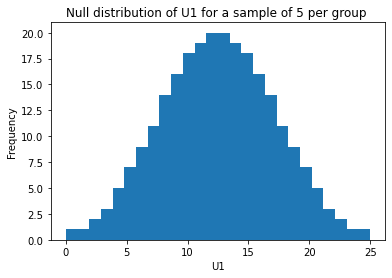

In [5]:
#finding the null distribution of U1 when there are 5 samples collected per group.

#imports the necessary packages 
import itertools 


r=5; #number of samples in each group
x=[i for i in itertools.product(["J","B"],repeat=(r*2))]; # for the two groups J and B, finds all possible combinations
#allowing for repeats for a length of 10 
#print(x)

x2=[''.join(x[i]) for i in range(0,len(x))]; #joins the letter combinations to form a string of each combination
# print (x2)

#it returns combinations where the number of letter repeats is greater than 5 but for this there can only be 5 repeats
#per combination so this returns a list of the combinations that only have 5 repeats of each letter 
y3=[x2[i] for i in range(0,len(x2)) if x2[i].count('J')==r and x2[i].count('B')==r ]; 

allcounts=[]; #initializes empty vector to add in the number of wins for each combination 

for i in range(0,len(y3)): #for loop iterates over the list of combinations     
    counts=[abs(x-len(y3[i])) for x in range(0,len(y3[i])) if y3[i][x]=='J']; #for each combination if the letter is a J
    #it returns the absolute value of the index - the length of the combination to return the rank of the J
    allcounts.append((sum(counts)-((r)*((r)+1))/2)); #finds the u value for each combination
    #using R1(sum of ranks) - n(n+1)/2 and adds it to a list 
    

plt.hist(allcounts,bins=26); #plots the u values 

#adds labels to the plots

plt.xlabel('U1')
plt.ylabel('Frequency')
plt.title('Null distribution of U1 for a sample of 5 per group ')
            

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.


In [6]:
#finding whether the following vectors come from the same distribution using the u statistic 

#vectors with the sample values 
a=[7,1,2,8,10];
b=[4,5,6,9,11];

u=[]; #initializing the empty list to place the wins inside 

for i in range(0,len(a)): #for loop iterating over the length of a 
    wins=[1 for x in range(0,len(b)) if a[i]>b[x]]; #loops over all elements of b if the element in a is greater than
    #the element in b then a 1 is added to the list 
    u.append(sum(wins)); # adds the number of wins for each element in a to the list u 

u1=sum(u) #sums up the total number of wins for a over b to get u1 
u2=(len(a)*len(b))-sum(u) #finds u2 using the formula u1+u2= n1*n2


#for the two sided p value, finds all u values less than the smaller u value (of u1 and u2) and all u values greater
#than the larger u value (of u1 and u2). Divided by the total number of U values in the distribution 

if u1<u2: 
    p=(len([x for x in allcounts if x<=u1])+len([x for x in allcounts if x>=u2]))/len(allcounts)
else:
    p=(len([x for x in allcounts if x>=u1])+len([x for x in allcounts if x<=u2]))/len(allcounts)

print("U1 (a-b) is",u1,'and U2 is',u2) 
print("the likelihood of a and b being from the same distribution is",p)

print("U and p values from the stats package. U1=",stats.mannwhitneyu(a,b)[0],"U2=",stats.mannwhitneyu(b,a)[0],"and p is",stats.mannwhitneyu(b,a)[1])
      

U1 (a-b) is 10 and U2 is 15
the likelihood of a and b being from the same distribution is 0.6904761904761905
U and p values from the stats package. U1= 10.0 U2= 15.0 and p is 0.6904761904761905
